# Generating Training Data

In [2]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import math
import random
from scipy import stats

In [3]:
functions = [lambda x : x, 
             lambda x : 101 - x,
             lambda x : 50.5 + 49.5 * math.sin(math.pi / 2 + x / (5 * math.pi)),
             lambda x : random.randint(1, 101)]

In [4]:
points = []
xs = []
ys = []
for i in range(50):
    x = random.randint(1,101)
    y = functions[2](x)
#     print(x, y)
    points.append((x,y))
    xs.append(x)
    ys.append(y)

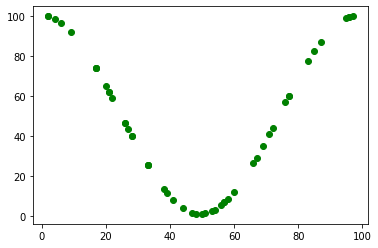

In [5]:
plt.figure()
plt.scatter(xs, ys, color="green")

In [6]:
def plot_function(func_num, plot=True):
    """
    Plot 50 (x,y) pairs for given function
    """
    points = []
    xs = []
    ys = []
    colors = ['maroon', 'blue', 'green', 'orange']
    for i in range(50):
        x = random.randint(1,101)
        y = functions[func_num](x)
    #     print(x, y)
        points.append((x,y))
        xs.append(x)
        ys.append(y)
    if plot:
        plt.figure()
        plt.scatter(xs, ys, color=colors[func_num])
    return (xs, ys)

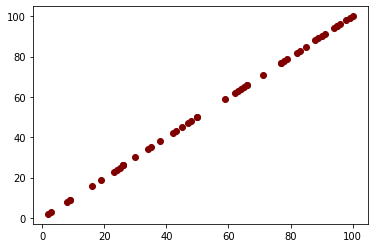

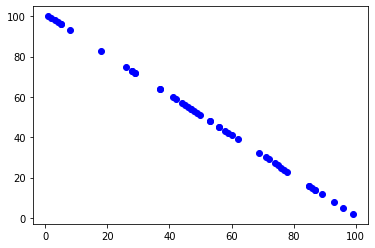

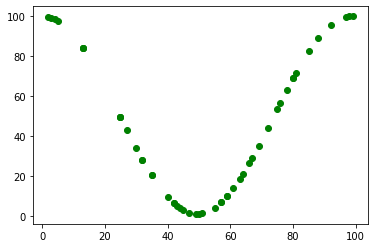

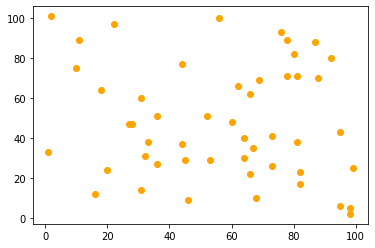

In [7]:
for i in range(4):
    plot_function(i)

In [8]:
def graph_normal(mu, sigma):
    # uncomment this code to graph the normal distribution 

    count, bins, ignored = plt.hist(a, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
             np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
             linewidth=2, color='r')
    plt.show()

In [9]:
# mu, sigma = 0, 1 # mean and standard deviation
a = np.random.normal(1, 1, 1000)
b = np.random.normal(0, 1, 1000)

In [10]:
asum= 0
for i in range(25):
    asum += a[random.randint(0,len(a)-1)]
print(asum/25)

1.2037756390846825


# Model for Generations with No Priors

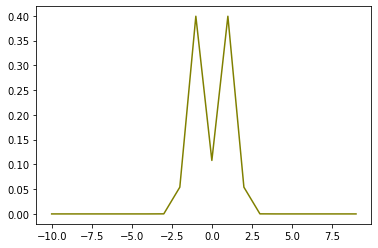

In [93]:

x = []
y = []
for a in range(-10, 10):
    stat = stats.norm.pdf(a, -1, 0.5)/2 + stats.norm.pdf(a, 1, 0.5)/2
    x.append(a)
    y.append(stat)
plt.plot(x, y, color="#808000")


In [95]:
def get_prob_data_given_func(points_known, a, b):
    prod = 0
    for x, y in points_known:
        y_pred = a*x+b
        stat = stats.norm.pdf(y_pred, y, 10)
        prod = prod + np.log(stat)
    return prod

def get_probs_for_discrete_funcs_given_data(points_known):
    probs = np.zeros((500,200))
    for a in np.arange(-2.0, 3.0, 0.01):
        for b in np.arange(-1.0, 1.0, 0.01):
            prob_a = stats.norm.pdf(a, -1, 0.5)/2 + stats.norm.pdf(a, 1, 0.5)/2
            prob_b = stats.norm.pdf(b, 0, 20)
            probs[int(100*a+200)][int(100*b+100)] = np.exp(get_prob_data_given_func(points_known, a, b)+np.log(prob_a)+np.log(prob_b))
    return probs

conditioning the data


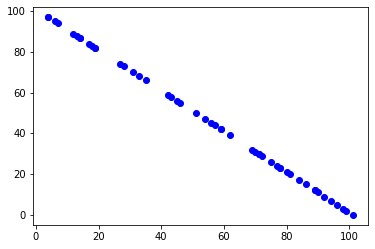

In [96]:
# Step 1 and 2: generate graph for first function
xs, ys = plot_function(1, plot=True)

# Step 3: take first 25 without replacement
bag_x = []
bag_y = []

new_x = []
new_y = []
points_known = []

for i in range(25):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)c
    points_known.append((x,y))
    
print('conditioning the data')
    
probs = get_probs_for_discrete_funcs_given_data(points_known)

In [97]:
ans = np.unravel_index(probs.argmax(), probs.shape)
a = (ans[0]-200)/100
b = (ans[1]-100)/100
print(a)
print(b)


0.37
0.99


In [98]:
#ans = np.unravel_index(probs.argmax(), probs.shape)
ii = np.unravel_index(np.argsort(probs.ravel())[-10:], probs.shape)
opts = []
for i in range(len(ii[0])):
    opts.append(((ii[0][i]-200)/100, (ii[1][i]-100)/100))
#have subject condition on points_known
print(opts)

[(0.35, 0.99), (0.38, 0.98), (0.37, 0.96), (0.36, 0.97), (0.38, 0.99), (0.37, 0.97), (0.36, 0.98), (0.37, 0.98), (0.36, 0.99), (0.37, 0.99)]


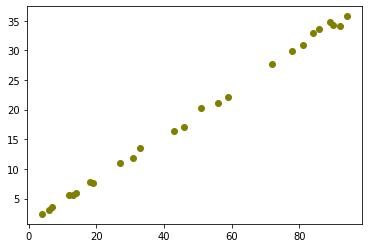

In [99]:
# do test step
for i in range(25):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)
    
    bag_x.append(x)
    bag_y.append(y)
    
    ind = random.randint(0, len(opts)-1)
    ans = opts[ind]
    a, b = ans[0], ans[1]
    sigma = 0.001
    mu = a * x + b

    y = np.random.normal(mu, sigma, 1000)
    y = y[random.randint(0,len(y)-1)]
    
#     # alternative method to sample from normal
#     y = mu + np.random.normal() * sigma
    
    new_x.append(x)
    new_y.append(y)

# graph after one generation

plt.figure()
plt.scatter(new_x, new_y, color="#808000")

In [26]:
probs[300][100]

167714950042570.97

In [ ]:
#### for multiple generations


# Step 1 and 2: generate graph for first function
xs, ys = plot_function(1, plot=True)
orig_x, orig_y = xs[:], ys[:]

# Step 3: take first 25 without replacement
bag_x = []
bag_y = []

for i in range(10):
    new_x = []
    new_y = []

    # training step
    for i in range(25): 
        ind = random.randint(0, len(xs)-1)
        x = xs.pop(ind)
        y = ys.pop(ind)

        bag_x.append(x)
        bag_y.append(y)

        probs = get_probs_for_discrete_funcs_given_data(points_known)
        ans = np.unravel_index(probs.argmax(), probs.shape)
        a, b = ans[0], ans[1]
        #have subject condition on points_known
        mu = a * x + b

        sigma = 0.001

        y = np.random.normal(mu, sigma, 1000)
        y = y[random.randint(0,len(y)-1)]

        y_guess = np.random.normal(mu, sigma, 1000)
        y_guess = y_guess[random.randint(0,len(y_guess)-1)]
        if abs(y_guess - y) <5:  
            points_known.append((x, y_guess))
    print("Number of Correct Guesses during Training: %d" %len(points_known))
    # test set
    for i in range(25):
        ind = random.randint(0, 25-i)
        x = orig_x.pop(ind)
        y = orig_y.pop(ind)
        orig_x.append(x)
        orig_y.append(y)

        bag_x.append(x)
        bag_y.append(y)

        #condition on points_known
        probs = get_probs_for_discrete_funcs_given_data(points_known)
        ans = np.unravel_index(probs.argmax(), probs.shape)
        a, b = ans[0], ans[1]
        #have subject condition on points_known
        mu = a * x + b

        sigma = 0.001

        y = np.random.normal(mu, sigma, 1000)
        y = y[random.randint(0,len(y)-1)]

    #     # alternative method to sample from normal
    #     y = mu + np.random.normal() * sigma

        new_x.append(x)
        new_y.append(y)

    # graph after one generation

    plt.figure()
    plt.scatter(new_x, new_y, color="#808000")
    
    xs = new_x
    ys = new_y

# Model For Generation with Priors

In [11]:
def get_subject_func_extremes(xs, ys, x):
    tups = []
    for ind in range(len(xs)):
        tups.append((xs[ind],ys[ind]))
    tups.sort()
    x1,y1 = tups[0]
    x2,y2 = tups[-1]
    slope = (y2 -y1)/(x2 -x1)
    y_int = y1 - slope*x1
    return x * slope + y_int

def get_subject_func_priors(xs, ys, x):
    functions = [(100, -1), (100, -2), (75, -1), (1, 0), (2, 0), (3, 0)] #tuples of slope and y_intercept of functions
    y_max_ind = ys[max(y)]
    if abs(max(y) - xs[y_max_ind]) > 20: #place higher weight on negative slopes
        probs = [0.4, 0.2, 0.1, 0.2, 0.05, 0.05]
    else:
        probs = [0.2, 0.05, 0.05, 0.4, 0.15, 0.15]   
        
    # elements at corresponding indices of functions and probs should be paired together, 
    # i.e. y = 100 - x has a prior probability of 0.4 

    cum_sum_probs = [probs[0]]
    for ind in range(1, len(probs)):
        cum_sum_probs.append(cum_sum_probs[-1]+probs[ind])
    
    #determine which function to select
    prob = random.randint(0, 100)
    for ind in range(len(cum_sum_probs)):
        threshold = cum_sum_probs[ind] * 100
        if prob <= threshold:
            slope, y_int = functions[ind]
            return slope * x + y_int
    slope, y_int = functions[-1]
    return slope*x+y_int


TypeError: 'int' object is not iterable

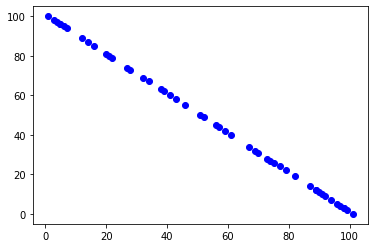

In [12]:
# Step 1 and 2: generate graph for first function
xs, ys = plot_function(1, plot=True)

# Step 3: take first 25 without replacement
bag_x = []
bag_y = []

new_x = []
new_y = []
for i in range(25):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)
    
    bag_x.append(x)
    bag_y.append(y)

    mu = a[random.randint(0,len(a)-1)] * x + b[random.randint(0,len(b)-1)]
    
    sigma = 0.001
    
    y = np.random.normal(mu, sigma, 1000)
    y = y[random.randint(0,len(y)-1)]
    
#     # alternative method to sample from normal
#     y = mu + np.random.normal() * sigma
    
    new_x.append(x)
    new_y.append(y)

# have the subject label 25 points
for i in range(25):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)
    
    bag_x.append(x)
    bag_y.append(y)
    
    #subject gets the x that they have to label, along with the xvalues and corresponding yvalues they know so far
    subject_y = get_subject_func_priors(new_x, new_y, x)
    
    new_x.append(x)
    new_y.append(subject_y)

# graph after one generation

plt.figure()
plt.scatter(new_x, new_y, color="#808000")